## Download...

In [ ]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Activation, Dropout,\
        BatchNormalization, Conv1D, MaxPooling1D,\
        Conv1DTranspose, Flatten, BatchNormalization,\
         Dropout, Input, Reshape, concatenate
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical, plot_model as pm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import random
from tensorflow.python.keras.callbacks import LambdaCallback
from tensorflow.python.keras.callbacks import LearningRateScheduler

%matplotlib inline

from tensorflow.keras.models import load_model
import seaborn as sns
sns.set_style('darkgrid')

class CallBacK():
  
  def on_train_begin(self, logs):

    print('\u001b[36m','========= Education =========',  '\u001b[0m')
    print('------------------------------')
    self.curr = {}
    self.path = '/content/best_model_2.h5'

    self.hs = {}
    self.hs['loss'] = []
    self.hs['val_loss'] = []
    self.hs['mae'] = []
    self.hs['val_mae'] = []


  def on_epoch_end(self, epoch, logs):

    self.hs['loss'].append(logs['loss'])
    self.hs['val_loss'].append(logs['val_loss'])
    self.hs['mae'].append(logs['mae'])
    self.hs['val_mae'].append(logs['val_mae'])
    self.curr_val = round(logs['val_mae'], 4)
    self.curr[epoch] = self.curr_val

    if epoch == 0:
      self.best_val = self.curr_val
      print('1 эпоха и self.best_val =', self.best_val)
      print('Текущая точность:', self.curr_val)
      print()
    else:  
      if self.best_val > self.curr_val:
        self.best_val = self.curr_val
        model.save(self.path)
      print('{} эпоха и self.best_val = {}'.format(epoch+1, self.best_val))
      print('Текущая точность:', self.curr_val)
      print()

  def on_train_end(self, logs):
    global model
    model = load_model(self.path)

    for key, val in self.curr.items():
      if val == min(self.curr.values()):
        print('\u001b[44m', '\u001b[37;1m', 'epoch: {} val_acc: {}'.format(key+1,val), '\u001b[0m')
      else:
        print('epoch: {} val_accuracy: {} '.format(key+1,val))
    print('-------------------------------')
    print('\u001b[36m', '====== Training completed ====', '\u001b[0m')
    print('===============================')

    plt.figure(2, figsize=(12,9))

    plt.subplot(221)
    plt.title('Accuracy', fontsize=18, color='grey')
    plt.plot(self.hs['mae'], label='mae', c='blue')
    plt.plot(self.hs['val_mae'], label='val_mae', c='red')
    plt.ylabel('% mae', fontsize = 13, color = 'grey')
    plt.xlabel('epoch', fontsize = 13, color = 'grey')
    plt.legend()

    plt.subplot(222)
    plt.title('Loss', fontsize=18, color='grey')
    plt.plot(self.hs['loss'], label='loss', c='blue')
    plt.plot(self.hs['val_loss'], label='val_loss', c='red')
    plt.ylabel('error', fontsize = 13, color = 'grey')
    plt.xlabel('epoch', fontsize = 13, color = 'grey')
    plt.legend()
    plt.show()


CaLL = CallBacK()

lamCB = LambdaCallback(on_train_begin = CaLL.on_train_begin,
                       on_epoch_end = CaLL.on_epoch_end,
                       on_train_end = CaLL.on_train_end)



In [ ]:
cars = pd.read_csv('/content/drive/MyDrive/Базы/cars_new.csv')

In [ ]:
# cars.to_csv('/content/drive/MyDrive/Базы/cars_new.csv', index=False)

## Check the data

In [ ]:
cars

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
0,kia,cerato,996000,2018,28000,седан,автомат,бензин,2.0,150.0
1,daewoo,nexia 1 поколение [2-й рестайлинг],140200,2012,60500,седан,механика,бензин,1.5,80.0
2,suzuki,jimny 3 поколение [рестайлинг],750000,2011,29000,внедорожник,автомат,бензин,1.3,85.0
3,bmw,x1 18 e84 [рестайлинг],970000,2014,49500,кроссовер,автомат,бензин,2.0,150.0
4,chevrolet,lacetti 1 поколение,205000,2007,151445,седан,механика,бензин,1.4,95.0
...,...,...,...,...,...,...,...,...,...,...
69509,skoda,fabia 5j [рестайлинг],310000,2011,165000,хетчбэк,механика,бензин,1.2,70.0
69510,ford,focus 3 поколение,400000,2011,125000,хетчбэк,механика,бензин,1.6,105.0
69511,mazda,cx-5 1 поколение,1140000,2013,89981,кроссовер,автомат,бензин,2.0,150.0
69512,toyota,bb 2 поколение,550550,2006,183000,минивэн,автомат,бензин,1.3,92.0


In [ ]:
def test(x, v):
  return car_vol[x][car_vol[x] < v]

In [ ]:
def delite(mask): 
  global cars
  car_vol = mask.keys() # Удалим авто с обьемом более 5 литров
  print(len(car_vol))
  cars.drop(car_vol, inplace=True)
  cars = cars.reset_index(drop=True)

In [ ]:
def show_(n):
  global car_vol
  mask = cars[['mark', n]]
  car_vol = mask.sort_values(n, ascending=False)
  y = car_vol.mark.values
  x = car_vol[n].values

  plt.plot(x,y, '.')
  plt.title(n)
  plt.show()

In [ ]:
delite(mask)

163


In [ ]:
mask = test(a, 1984)
mask

29854    1983
9440     1983
29297    1983
46948    1983
49423    1983
         ... 
14171    1951
49473    1950
2020     1950
6847     1950
38590    1949
Name: year, Length: 163, dtype: int64

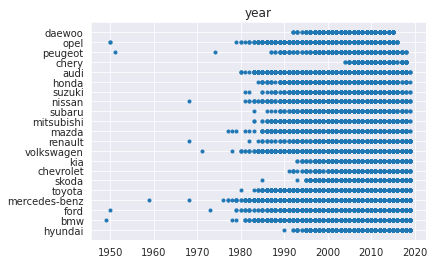

In [ ]:
a = 'year'
show_(a)

In [ ]:
mask = cars[['mark', 'volume']]
car_vol = mask.sort_values('volume', ascending=False)

In [ ]:
y = car_vol.mark.values
x = car_vol.volume.values

In [ ]:
x

array([7. , 7. , 7. , ..., 0.7, 0.7, 0.7])

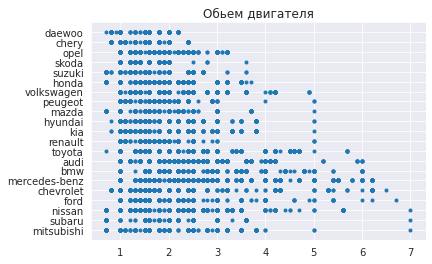

In [ ]:
''' Проверим выборосы по обьему двигателя '''
plt.plot(x,y, '.')
plt.title('Обьем двигателя')
plt.show()

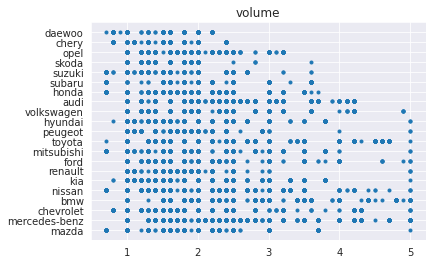

In [ ]:
show_('volume')

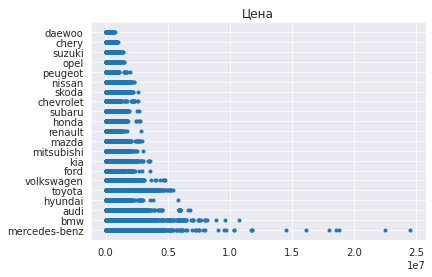

In [ ]:
''' Можно попробывать отрезать машины дороже 8 млн'''
plt.plot(x,y, '.')
plt.title('Цена')
plt.show()

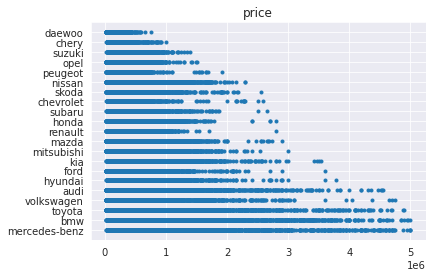

In [ ]:
show_('price')

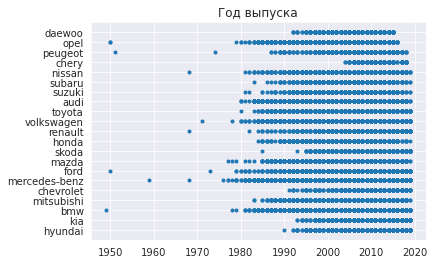

In [ ]:
plt.plot(x,y, '.')
plt.title('Год выпуска');

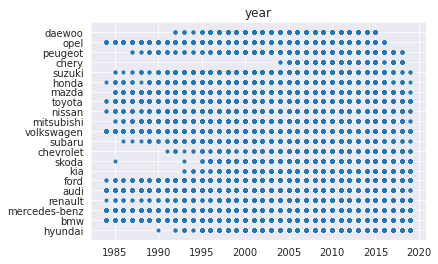

In [ ]:
show_('year')

## Create X_train and Y_train

In [ ]:
def create_dict(s):
  dic = {}
  for i, v in enumerate(set(s)):
    dic.update({v:i})
  return dic
colum = ['mark', 'model', 'body', 'kpp', 'fuel']
for i in range(5):
  colum[i] = create_dict(cars[colum[i]])

def norm(x):
  return preprocessing.scale(x)

col_int = ['year', 'mileage', 'volume', 'power']
for i in range(len(col_int)):
  col_int[i] = norm(cars[col_int[i]])

def ohe(col, val):
  rr = [0] * len(col)
  rr[col[val]] = 1
  return rr

prices = cars.price

In [ ]:
x_train = []
y_train = []
for indx, car in enumerate(np.array(cars)):
  y_train.append(prices[indx])

  x_tr = ohe(colum[0], car[0]) +\
         ohe(colum[1], car[1]) +\
         ohe(colum[2], car[5]) +\
         ohe(colum[3], car[6]) +\
         ohe(colum[4], car[7]) +\
         [col_int[0][indx]] + \
         [col_int[1][indx]] + \
         [col_int[2][indx]] + \
         [col_int[3][indx]]
  x_train.append(x_tr)

x_train = np.array(x_train)
y_train = np.array(y_train)
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

In [ ]:
print(x_train.shape)
print(y_train.shape)

(70094, 3200)
(70094,)


In [ ]:
print(x_train.shape)
print(y_train.shape)

(69514, 3063)
(69514,)


In [ ]:
x_train = x_train.reshape(69514, 3063)
x_train.shape

(69514, 3063)

In [ ]:
a = 70094
b = 69514
def proc(p1,p2):
  print('Потеря базы составила:', str(round(p1/p2*100, 2)) + '%')

proc((a-b), a)

Потеря базы составила: 0.83%


In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x_train, y_train_scaled, test_size=0.1, shuffle=True)
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(62562, 3063)
(62562,)
(6952, 3063)
(6952,)


# creation of a neural network

#### ver.01

 ========= Education ========= 
------------------------------
1 эпоха и self.best_val = 0.1731
Текущая точность: 0.1731

2 эпоха и self.best_val = 0.139
Текущая точность: 0.139

3 эпоха и self.best_val = 0.139
Текущая точность: 0.1425

4 эпоха и self.best_val = 0.1372
Текущая точность: 0.1372

5 эпоха и self.best_val = 0.1268
Текущая точность: 0.1268

6 эпоха и self.best_val = 0.1268
Текущая точность: 0.1305

7 эпоха и self.best_val = 0.1268
Текущая точность: 0.1268

8 эпоха и self.best_val = 0.1248
Текущая точность: 0.1248

9 эпоха и self.best_val = 0.1248
Текущая точность: 0.1328

10 эпоха и self.best_val = 0.1248
Текущая точность: 0.1288

11 эпоха и self.best_val = 0.1248
Текущая точность: 0.1286

12 эпоха и self.best_val = 0.1248
Текущая точность: 0.1267

13 эпоха и self.best_val = 0.1248
Текущая точность: 0.146

14 эпоха и self.best_val = 0.1248
Текущая точность: 0.1347

15 эпоха и self.best_val = 0.124
Текущая точность: 0.124

epoch: 1 val_accuracy: 0.1731 
epoch: 2 val_accuracy

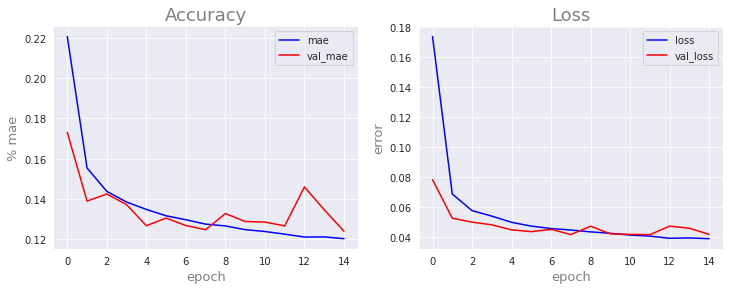

----------------------------------------------

Средняя ошибка:  63694
Средняя цена:  516599
Суммарный процент ошибки: 12.33%
Точность: 87.67%


In [ ]:
def dense(n):
  return Dense(n, activation='relu')

inputt = x_train.shape[1]
dr = 0.1

input_model = Input(shape=(inputt,))

x = dense(300)(input_model)
x = Dropout(dr)(x)
x = dense(900)(x)
x = Dropout(dr)(x)
x = dense(200)(x)
x = Dropout(dr)(x)
out = Dense(1, activation='linear')(x)

model = Model(input_model, out)

model.compile(optimizer=RMSprop(0.0001), loss='mse', metrics=['mae'])

model.fit(Xtrain, Ytrain, epochs=15, batch_size=128,\
          validation_split=0.2, verbose=0, callbacks=lamCB)

pred = model.predict(Xtest)
pr_inv = y_scaler.inverse_transform(pred).flatten()
y_inv = y_scaler.inverse_transform(Ytest).flatten()
print('----------------------------------------------')
print()
round(np.mean(abs(pr_inv - y_inv))/y_inv.shape[0], 2)


# Предсказываем проверочную выборку
predict = model.predict(Xtest)
# Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()
y_inv = y_scaler.inverse_transform(Ytest).flatten()

# Считаем среднюю цену, среднюю ошибку и средний процент ошибки
mean_delta = np.mean(abs(predict - y_inv))
mean_price = np.mean(y_inv)
print('Средняя ошибка: ', round(mean_delta))
print('Средняя цена: ', round(mean_price))
er = round(100*mean_delta/mean_price, 2)
print('Суммарный процент ошибки: ', er, '%', sep='')
print('Точность: {}%'.format(100-er))

 ========= Education ========= 
------------------------------
1 эпоха и self.best_val = 0.1212
Текущая точность: 0.1212

2 эпоха и self.best_val = 0.1189
Текущая точность: 0.1189

3 эпоха и self.best_val = 0.1189
Текущая точность: 0.1197

4 эпоха и self.best_val = 0.1189
Текущая точность: 0.1197

5 эпоха и self.best_val = 0.1189
Текущая точность: 0.1203

epoch: 1 val_accuracy: 0.1212 
  epoch: 2 val_acc: 0.1189 
epoch: 3 val_accuracy: 0.1197 
epoch: 4 val_accuracy: 0.1197 
epoch: 5 val_accuracy: 0.1203 
-------------------------------
 ====== Training completed ==== 


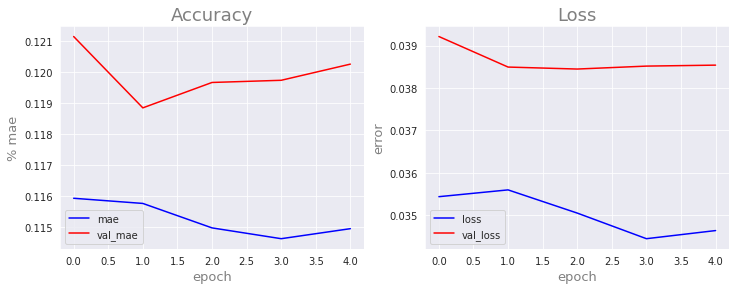

----------------------------------------------

Средняя ошибка:  60839
Средняя цена:  516599
Суммарный процент ошибки: 11.78%
Точность: 88.22%


In [ ]:
model.compile(optimizer=Adam(0.00001), loss='mse', metrics=['mae'])

model.fit(Xtrain, Ytrain, epochs=5, batch_size=128,\
          validation_split=0.2, verbose=0, callbacks=lamCB)

pred = model.predict(Xtest)
pr_inv = y_scaler.inverse_transform(pred).flatten()
y_inv = y_scaler.inverse_transform(Ytest).flatten()
print('----------------------------------------------')
print()
round(np.mean(abs(pr_inv - y_inv))/y_inv.shape[0], 2)


# Предсказываем проверочную выборку
predict = model.predict(Xtest)
# Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()
y_inv = y_scaler.inverse_transform(Ytest).flatten()

# Считаем среднюю цену, среднюю ошибку и средний процент ошибки
mean_delta = np.mean(abs(predict - y_inv))
mean_price = np.mean(y_inv)
print('Средняя ошибка: ', round(mean_delta))
print('Средняя цена: ', round(mean_price))
er = round(100*mean_delta/mean_price, 2)
print('Суммарный процент ошибки: ', er, '%', sep='')
print('Точность: {}%'.format(100-er))

#### ver.02

In [ ]:
def dense(n):
  return Dense(n, activation='relu')

def con(n):
  return Conv1D(n, 3, padding='same', activation='relu')

inputt = x_train.shape[1]
dr = 0.1

input_model = Input(shape=(inputt,))

x2 = dense(256)(input_model)
x2 = Dropout(dr)(x2)
x2 = dense(512)(x2)
x2 = Dropout(dr)(x2)

x1 = dense(2048)(input_model)
x1 = Dropout(0.2)(x1)

x = concatenate((x2,x1))

x = dense(200)(x)
x = Dropout(dr)(x)
out = Dense(1, activation='linear')(x)

model = Model(input_model, out)

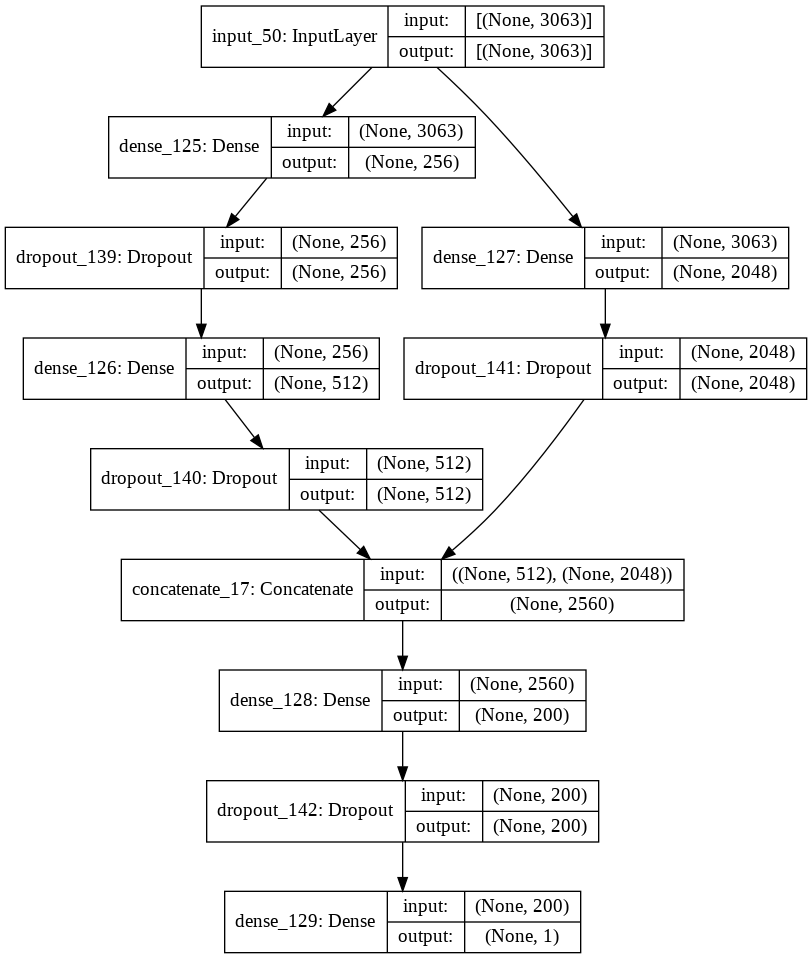

In [ ]:
pm(model, show_shapes=True)

 ========= Education ========= 
------------------------------
1 эпоха и self.best_val = 0.1772
Текущая точность: 0.1772

2 эпоха и self.best_val = 0.1487
Текущая точность: 0.1487

3 эпоха и self.best_val = 0.129
Текущая точность: 0.129

4 эпоха и self.best_val = 0.129
Текущая точность: 0.1334

5 эпоха и self.best_val = 0.1227
Текущая точность: 0.1227

6 эпоха и self.best_val = 0.1227
Текущая точность: 0.1336

7 эпоха и self.best_val = 0.1227
Текущая точность: 0.1288

8 эпоха и self.best_val = 0.122
Текущая точность: 0.122

9 эпоха и self.best_val = 0.1218
Текущая точность: 0.1218

10 эпоха и self.best_val = 0.1218
Текущая точность: 0.1221

11 эпоха и self.best_val = 0.1218
Текущая точность: 0.1251

12 эпоха и self.best_val = 0.1218
Текущая точность: 0.1264

13 эпоха и self.best_val = 0.1218
Текущая точность: 0.1237

14 эпоха и self.best_val = 0.1218
Текущая точность: 0.1235

15 эпоха и self.best_val = 0.1218
Текущая точность: 0.1341

epoch: 1 val_accuracy: 0.1772 
epoch: 2 val_accurac

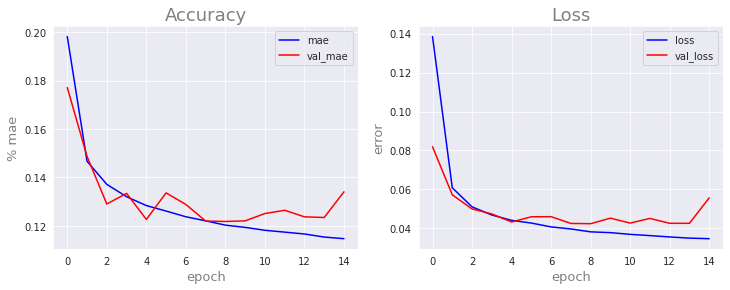

In [ ]:
model.compile(optimizer=RMSprop(0.0001), loss='mse', metrics=['mae'])

model.fit(Xtrain, Ytrain, epochs=15, batch_size=128,\
          validation_split=0.2, verbose=0, callbacks=lamCB)

 ========= Education ========= 
------------------------------
1 эпоха и self.best_val = 0.1177
Текущая точность: 0.1177

2 эпоха и self.best_val = 0.1177
Текущая точность: 0.1181

3 эпоха и self.best_val = 0.1176
Текущая точность: 0.1176

4 эпоха и self.best_val = 0.1176
Текущая точность: 0.1176

5 эпоха и self.best_val = 0.1176
Текущая точность: 0.1177

6 эпоха и self.best_val = 0.1175
Текущая точность: 0.1175

7 эпоха и self.best_val = 0.1174
Текущая точность: 0.1174

8 эпоха и self.best_val = 0.1174
Текущая точность: 0.1175

9 эпоха и self.best_val = 0.1174
Текущая точность: 0.1177

10 эпоха и self.best_val = 0.1174
Текущая точность: 0.1179

11 эпоха и self.best_val = 0.1174
Текущая точность: 0.118

12 эпоха и self.best_val = 0.1174
Текущая точность: 0.1177

13 эпоха и self.best_val = 0.1174
Текущая точность: 0.1181

14 эпоха и self.best_val = 0.1174
Текущая точность: 0.1178

15 эпоха и self.best_val = 0.1174
Текущая точность: 0.118

epoch: 1 val_accuracy: 0.1177 
epoch: 2 val_accu

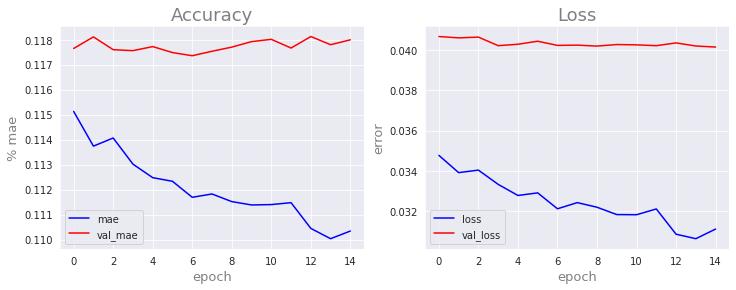

----------------------------------------------

Средняя ошибка:  58927
Средняя цена:  506965
Суммарный процент ошибки: 11.62%
Точность: 88.38%


In [ ]:
model.compile(optimizer=Adam(0.00001), loss='mse', metrics=['mae'])

model.fit(Xtrain, Ytrain, epochs=15, batch_size=128,\
          validation_split=0.2, verbose=0, callbacks=lamCB)

pred = model.predict(Xtest)
pr_inv = y_scaler.inverse_transform(pred).flatten()
y_inv = y_scaler.inverse_transform(Ytest).flatten()
print('----------------------------------------------')
print()
round(np.mean(abs(pr_inv - y_inv))/y_inv.shape[0], 2)


# Предсказываем проверочную выборку
predict = model.predict(Xtest)
# Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()
y_inv = y_scaler.inverse_transform(Ytest).flatten()

# Считаем среднюю цену, среднюю ошибку и средний процент ошибки
mean_delta = np.mean(abs(predict - y_inv))
mean_price = np.mean(y_inv)
print('Средняя ошибка: ', round(mean_delta))
print('Средняя цена: ', round(mean_price))
er = round(100*mean_delta/mean_price, 2)
print('Суммарный процент ошибки: ', er, '%', sep='')
print('Точность: {}%'.format(100-er))

> Средняя ошибка:  60839\
Средняя цена:  516599\
Суммарный процент ошибки: 11.78%\
Точность: 88.22%